In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('AirPassengers.csv')
df.head()

,Month,Passengers
0,15-01-1949,112
1,15-02-1949,118
2,15-03-1949,132
3,15-04-1949,129
4,15-05-1949,121


In [3]:
df.tail()

,Month,Passengers
139,15-08-1960,606
140,15-09-1960,508
141,15-10-1960,461
142,15-11-1960,390
143,15-12-1960,432


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [5]:
df=df.set_index('Month')
df.head()

,Passengers
Month,
15-01-1949,112
15-02-1949,118
15-03-1949,132
15-04-1949,129
15-05-1949,121


# Visualize the time series
**Check for trend,seasonality or random patterns**

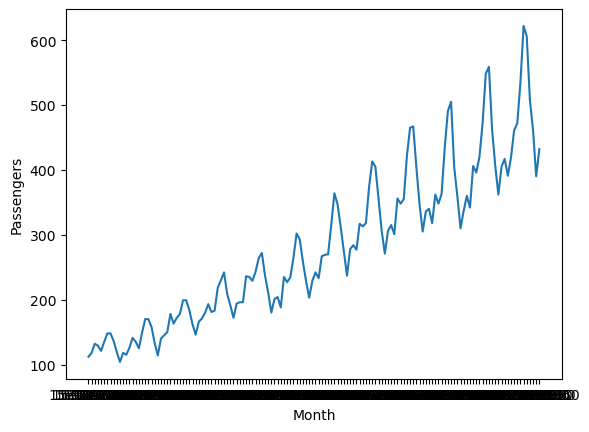

In [6]:
sns.lineplot(x=df.index,y=df['Passengers'])
plt.show()

In [7]:
#it is a uptrend,it is non stationary because mean also increases

# Check for stationarity

**Method-1:Rolling Statistics**

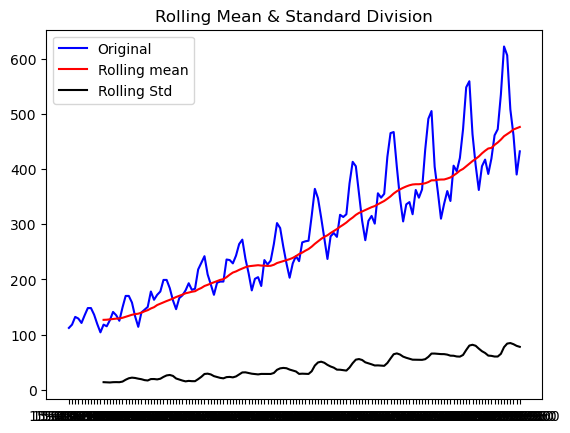

In [8]:
# Determining rolling Statistics
rolmean=df['Passengers'].rolling(window=12).mean()   #window=12 means every 12 record calculate (1-12,2-13...)
rolstd=df['Passengers'].rolling(window=12).std()     # why select 12 maens every year=12 months#

# Plot rolling stastistics:
orig=plt.plot(df['Passengers'],color='blue',label='Original') #plt.plot means line plot
mean=plt.plot(rolmean,color='red',label='Rolling mean')
std=plt.plot(rolstd,color='black',label='Rolling Std')
plt.title('Rolling Mean & Standard Division')
plt.legend()
plt.show()

**Method 2: Augmented Dicky Fuller (ADF) Test**

* For the ADF Test:
    * H0=data is non-stationary
    * H1=data is stationary
* Based on p-value,we will accept or reject H0(if p-valu < 5% reject null hypothesis)


In [9]:
from statsmodels.tsa.stattools import adfuller
adfuller_result=adfuller(df['Passengers'])
adfuller_result

(0.8153688792060423,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.6929308390189)

In [10]:
print('p-value:',adfuller_result[1])

p-value: 0.9918802434376409


# Now,we have to convert the non-stationary data to stationary data

**Differencing**
* How to convert data to stationary by apply Differencing then apply ML Algorithm.

In [11]:
df['Passengers']

Month
15-01-1949    112
15-02-1949    118
15-03-1949    132
15-04-1949    129
15-05-1949    121
             ... 
15-08-1960    606
15-09-1960    508
15-10-1960    461
15-11-1960    390
15-12-1960    432
Name: Passengers, Length: 144, dtype: int64

In [12]:
#  Apply differencing
#df["Passengers"]-df["Passengers"].shift(1) #shift(1) means it has remove the previous value

In [13]:
#  Apply differencing
diff=df["Passengers"]-df["Passengers"].shift(2) #shift(1) means it has remove the previous two value

diff.dropna(inplace=True)
# check whether the data is stationary or  not after applying differencing shift(1,2...n) upto p-value < 0.05
# Applying ADF(Augmented Dicky Fuller) test
adfuller_result=adfuller(diff)

In [14]:
print('p-value of adf test:',adfuller_result[1])

p-value of adf test: 0.03862975767698849


* Now,the diff time series is stationary then apply ML Algorithm.

In [15]:
# Time series Models:

#  1.Auto Regressive (AR model):just apply regression Algorithm based on the two input variable. y hat = b0+b1x
          
#  2.Moving Average (MA model)
#  3.Auto Regressive & Moving Average (ARMA model)
#  4.Auto Regressive Integrated Moving Average (ARIMA model)
#  5.Seasonal Auto Regressive Integrated Moving Average (SARIMA model)

 **Plot ACF(AutoCorrelation Function) / PACF(Partial AutoCorrelation Function) p=AR() valu,d=difference,q=MA() value parameter**



# Build ARIMA Model

**ARIMA model is build by using p,d,q values**
* p is AR value (determined from PACF plot)
* d is intergration
* q is MA value(determined from ACF plot)

**Plot ACF/PCF and find p & q parameters**
* Auto Correlation Function(ACF)- A function which gives us values of auto-correlation of any series with its lagged values.
* Partial AutoCorrelation Function(PACF)- An indirect finction to find Auto correlation after removing the relationship explained by previous lags.

**Time series lag example**
* Original time series={21,22,21,20,19}
* Lagged time series by 1 lag={22,21,20,19}
* Lag 1 correlation will be correlation beetween {21,22,21,20,19} and {22,21,20,19}

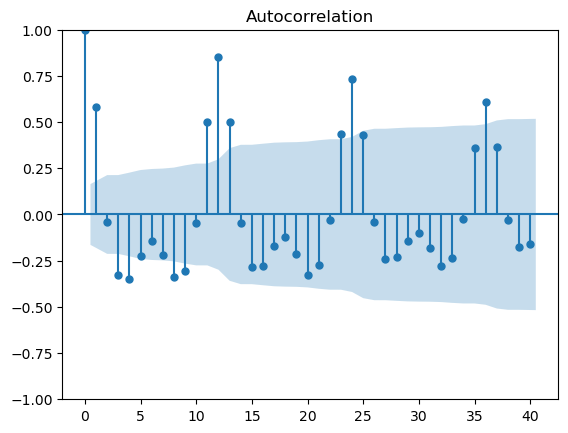

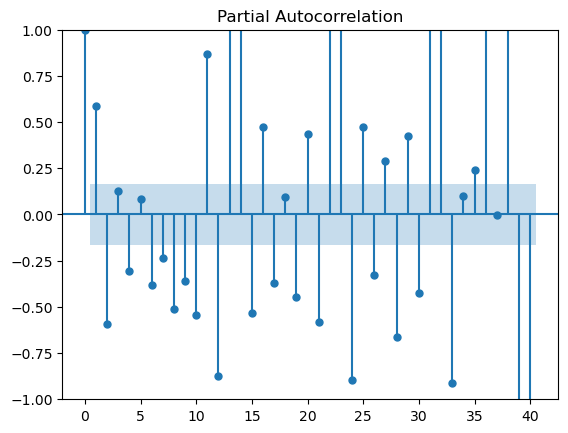

In [16]:
from statsmodels.tsa.stattools import acf,pacf
import statsmodels.api as sm
fig=sm.graphics.tsa.plot_acf(diff,lags=40)
fig=sm.graphics.tsa.plot_pacf(diff,lags=40)

**From ACF curve,optimal value of q in the ARIMA model must be 1**

**From PACF curve,optimal value of p in the ARIMA model is 1** 

# Train-test Split

**Split the data into train (80%) & test(20%)**

 * for time series data,we have use first 80% of records for taining & next 20% of records for testing.
 * here 80%=0.8*142=144 records,so first 114 records we have to use training.
 
**Note: We should not apply train-test split function,because it divides the data randomly** 

In [17]:
y_train=diff[:144]
y_test=diff[144:]

# Modelling

In [18]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(diff,order=(1,2,1))
ARIMA=model.fit()

G:\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
G:\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
G:\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


# Prediction 

In [24]:
ypred_test=ARIMA.predict(start=y_test.index[0],end=y_test.index[1])
#ypred_train=ARIMA.predict(start=y_train.index[0],end=y_train.index[-1])

IndexError: index 0 is out of bounds for axis 0 with size 0

In [25]:
from sklearn.metrics import r2_score
print("Train R2",r2_score(ypred_train,y_train))
print("Test R2",r2_score(ypred_test,y_test))


NameError: name 'ypred_train' is not defined